# Answer the following 3 questions

## Problem 1 (25 points)

Unzip **hurricane_nate_subset.zip.** Create a Notebook that uses ```arcpy``` Answer the following questions:
1. How many rasters are in the folder?
2. What is the projection of the rasters? All you have to do is show that you can print out the projection of the rasters.
3. Do all the rasters have the same projection? All you have to do is tell me yes or no.
4. How many bands to the rasters have? 

In [8]:
import arcpy

arcpy.env.workspace = r'C:\PROJECTS\N2W\hurricane_nate_subset'

rasters = arcpy.ListRasters()
print("The Number of Rasters is: " + str(len(rasters)))

for ras in rasters:
    desc = arcpy.Describe(ras)
    print(ras)
    print('Spatial Reference: ' +desc.SpatialReference.name)
    print('Number of Bands: ' + str(desc.bandCount))

The Number of Rasters is: 16
20171010aC0874030w301630n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874200w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874200w301630n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874330w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874330w301630n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874500w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874630w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874800w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0874930w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0875100w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0875230w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0875400w301500n.tif
Spatial Reference: GCS_WGS_1984
Shape Type: 4
20171010aC0875530w301500n.tif
Spatial Reference: GCS_WGS_19

## Problem 2 (25 Points)

Unzip **tlgdb_2019_a_29_mo.gdb.zip** Create a Notebook that uses arcpy to create a report about the features in the geodatabase. List out the following:
- Feature class name
- Number of features in the feature class
- Spatial reference name of the feature class
- The Shape Type of the feature class (for example, point, polyline, or polygon)

In [5]:
import arcpy

gdb = r'C:\Users\greg6750\Documents\IPython Notebooks\intro-prog-for-gis-rs\tlgdb_2019_a_29_mo.gdb'

arcpy.env.workspace = gdb

fcs = arcpy.ListFeatureClasses()
print(fcs)
for fc in fcs:
    print('Feature Class name: ' + fc)
    print('Number of features: ' + str(arcpy.GetCount_management(fc)))
    desc = arcpy.Describe(fc)
    print('Spatial Reference: ' +desc.SpatialReference.name)
    print('Shape Type: ' + desc.ShapeType)
    

['Block', 'Census_Tract', 'County_Subdivision', 'Block_Group', 'Census_Designated_Place', 'County', 'Incorporated_Place']
Feature Class name: Block
Number of features: 343565
Spatial Reference: GCS_North_American_1983
Shape Type: Polygon
Feature Class name: Census_Tract
Number of features: 1393
Spatial Reference: GCS_North_American_1983
Shape Type: Polygon
Feature Class name: County_Subdivision
Number of features: 1394
Spatial Reference: GCS_North_American_1983
Shape Type: Polygon
Feature Class name: Block_Group
Number of features: 4506
Spatial Reference: GCS_North_American_1983
Shape Type: Polygon
Feature Class name: Census_Designated_Place
Number of features: 84
Spatial Reference: GCS_North_American_1983
Shape Type: Polygon
Feature Class name: County
Number of features: 115
Spatial Reference: GCS_North_American_1983
Shape Type: Polygon
Feature Class name: Incorporated_Place
Number of features: 948
Spatial Reference: GCS_North_American_1983
Shape Type: Polygon


## Problem 3 - Creating Some Data Science Notebooks

### Houston Demographic Study
Using the [Popular Demographics in the United States](https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/AGOL_Base_2018_Final/FeatureServer/2), create a Python Notebook that answers the following questions
1. Creates a map over Texas. (**5 points**)
2. Adds the [Popular Demographics Layer](https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/AGOL_Base_2018_Final/FeatureServer/2) to the map. (**5 points**)
3. For the state of Texas only, what county had the greatest population in the year 2010(*TOTPOP10*)? (**5 points**)
4. For the state of Texas only, what county had the highest diversity index(*DIVINDX_CY*)? (**5points**)
5. Create a bar chart that shows the total population by county for the 10 most populous counties (*TOTPOP10*). (**5 points**)

In [4]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
gis = GIS('https://slustl.maps.arcgis.com/home', 'gregbrunner_slugis')

In [5]:
fl  = FeatureLayer('https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/AGOL_Base_2018_Final/FeatureServer/2', 
                   gis=gis)

In [6]:
tx_map = gis.map('Texas, USA')
tx_map

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
tx_map.add_layer(fl)

In [8]:
tx_sdf = fl.query(where = "ST_ABBREV='TX'").sdf

In [9]:
tx_sdf.head()

,OBJECTID,ID,NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,POPGRW10CY,...,Shape__Length,TOTHU_CY,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,SHAPE
0,2524,48001,Anderson County,TX,59244,44976,55.8,17444,2.58,0.16,...,398386.026644,20503,12157,5287,6131,6301,32136,12105,3059,"{""rings"": [[[-10622350, 3768864], [-10622940, ..."
1,2525,48003,Andrews County,TX,17614,17532,11.7,6240,2.81,2.14,...,304869.834168,6800,4449,1791,1976,2044,11406,3298,560,"{""rings"": [[[-11378081, 3832192], [-11378059, ..."
2,2526,48005,Angelina County,TX,91052,88114,114.1,32494,2.71,0.59,...,335935.312513,37213,20896,11598,10547,10795,58267,25551,4719,"{""rings"": [[[-10559361, 3699618], [-10559265, ..."
3,2527,48007,Aransas County,TX,27191,26746,107.9,11567,2.31,1.97,...,791039.802733,17419,8640,2927,3222,4104,16746,5953,5852,"{""rings"": [[[-10803845, 3232638], [-10804131, ..."
4,2528,48009,Archer County,TX,8893,8837,9.8,3477,2.54,-0.22,...,235456.875518,4107,2864,613,1467,1433,7411,1587,630,"{""rings"": [[[-10956139, 3948010], [-10992838, ..."


In [10]:
totpop_df = tx_sdf.sort_values('TOTPOP10', ascending=False)

In [11]:
totpop_df.head()

,OBJECTID,ID,NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,POPGRW10CY,...,Shape__Length,TOTHU_CY,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,SHAPE
100,2624,48201,Harris County,TX,4735852,4686760,2780.1,1647251,2.85,1.79,...,750614.469533,1790697,888580,758671,580173,234637,2436920,1611015,143446,"{""rings"": [[[-10584325, 3445369], [-10584246, ..."
56,2580,48113,Dallas County,TX,2654282,2620744,3046.4,950259,2.76,1.39,...,230987.335848,1041321,458110,492149,330081,125660,1323575,1014166,91062,"{""rings"": [[[-10797224, 3893886], [-10791251, ..."
219,2743,48439,Tarrant County,TX,2071433,2047194,2398.6,739506,2.77,1.66,...,230467.001957,782766,447684,291822,309193,99631,1178088,610312,43260,"{""rings"": [[[-10842349, 3894088], [-10818564, ..."
14,2538,48029,Bexar County,TX,1983678,1940431,1600.0,702539,2.76,1.78,...,313216.840829,741257,410898,291641,259216,109422,1068405,604367,38718,"{""rings"": [[[-10968756, 3471756], [-10968750, ..."
226,2750,48453,Travis County,TX,1258823,1235632,1271.3,495919,2.49,2.53,...,291495.086238,532048,257296,238623,161366,48649,563629,437591,36129,"{""rings"": [[[-10902053, 3582241], [-10900077, ..."


In [12]:
boomerpop_df = tx_sdf.sort_values('DIVINDX_CY', ascending=False)

In [13]:
boomerpop_df.head()

,OBJECTID,ID,NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,POPGRW10CY,...,Shape__Length,TOTHU_CY,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,SHAPE
56,2580,48113,Dallas County,TX,2654282,2620744,3046.4,950259,2.76,1.39,...,230987.335848,1041321,458110,492149,330081,125660,1323575,1014166,91062,"{""rings"": [[[-10797224, 3893886], [-10791251, ..."
100,2624,48201,Harris County,TX,4735852,4686760,2780.1,1647251,2.85,1.79,...,750614.469533,1790697,888580,758671,580173,234637,2436920,1611015,143446,"{""rings"": [[[-10584325, 3445369], [-10584246, ..."
78,2602,48157,Fort Bend County,TX,788102,782705,914.8,253541,3.09,3.67,...,281808.133553,262736,202834,50707,118789,30960,472104,107335,9195,"{""rings"": [[[-10667326, 3476364], [-10647921, ..."
224,2748,48449,Titus County,TX,33486,32872,82.5,10999,2.99,0.43,...,207040.209425,12343,7159,3840,4114,3369,22490,9487,1344,"{""rings"": [[[-10561567, 3947777], [-10561638, ..."
167,2691,48335,Mitchell County,TX,8915,7017,9.8,2795,2.51,-0.64,...,230936.959783,4064,1952,843,751,1293,5096,1901,1269,"{""rings"": [[[-11205959, 3779581], [-11206016, ..."


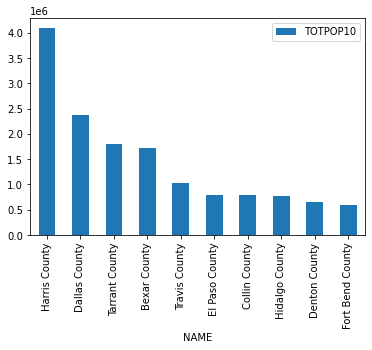

In [14]:
#from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
totpop_df.head(10).plot.bar('NAME', 'TOTPOP10')